In [3]:
run /home/alec/galvanize/capstone/Forecasting_Walmart_Sales/src/script.py

In [25]:
def plot_series_and_difference(axs, series, title):
    diff = series.diff()
    axs[0].plot(series.index, series)
    axs[0].set_title("Raw Series: {}".format(title))
    axs[1].plot(series.index, diff)
    axs[1].set_title("Series of First Differences: {}".format(title))

In [6]:
CA3_Foods3_Graphs = Graphs(make_series('CA_3', 'FOODS_3'), 'M', 'Walmart CA3 Store Foods3 Department Sales')

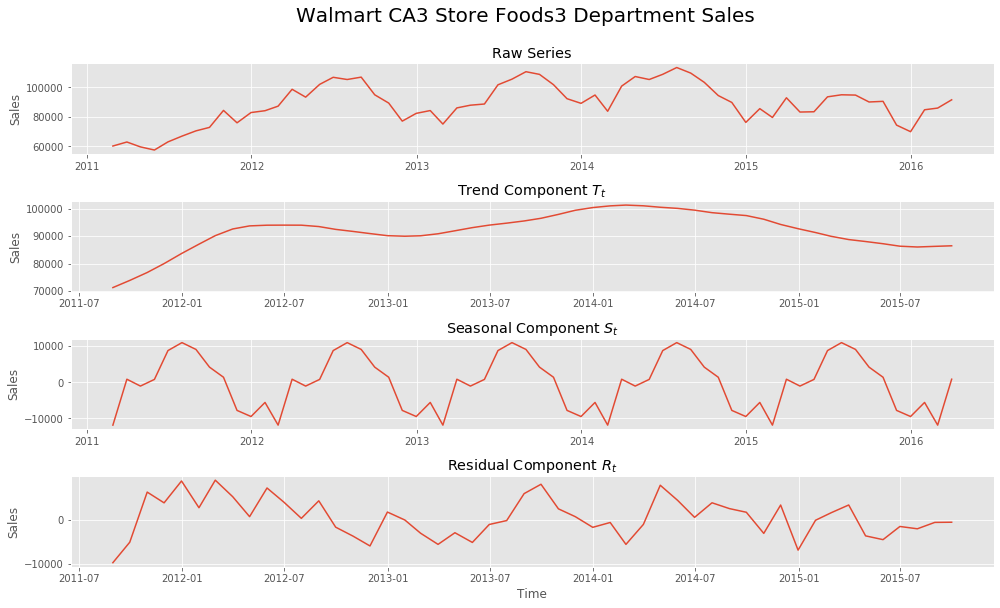

In [21]:
CA3_Foods3_Graphs.TSR()

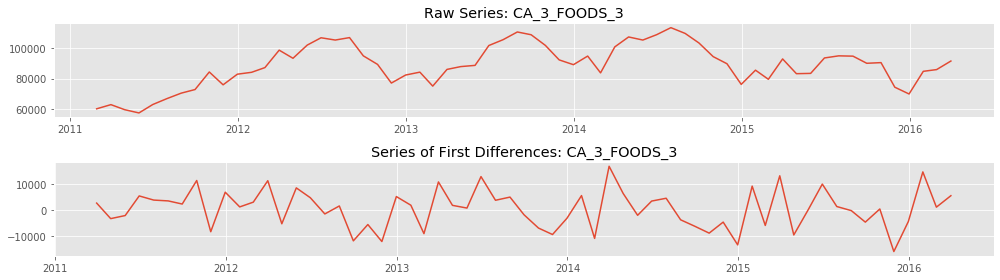

In [12]:
fig, axs = plt.subplots(2, figsize=(14, 4))
plot_series_and_difference(axs, resample_series(make_series('CA_3', 'FOODS_3'), 'M'), 'CA_3_FOODS_3')
fig.tight_layout()

In [156]:
len(series_setup(store_id, dept_id))

70

In [150]:
#check for stationary with no differencing

def no_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]])
    return round(test[1], 2)

lst= []
for i in series_setup(store_id, dept_id):
    lst.append(resample_series(make_series(i[0], i[1]), 'M'))

lst1 = []
for i in lst:
    lst1.append(no_diff_adf_pvalue(i))
    
lst_of_series_that_need_differencing = []
lst_of_series_no_differencing = []
for idx, val in enumerate(series_setup(store_id, dept_id)):
    #print(f"ADF p-value for {val} series: {lst1[idx]}")
    if lst1[idx] <= .05:
        lst_of_series_no_differencing.append(val)
    else:
        lst_of_series_that_need_differencing.append(val)
len(lst_of_series_that_need_differencing)

59

In [151]:
#check for stationary with 1 differencing

def one_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]].diff()[1:])
    return round(test[1], 2)

lst2= []
for i in lst_of_series_that_need_differencing:
    lst2.append(resample_series(make_series(i[0], i[1]), 'M'))

lst3 = []
for i in lst2:
    lst3.append(one_diff_adf_pvalue(i))

lst_of_series_that_need_one_differencing = []
lst_of_series_two_differencing = []
for idx, val in enumerate(lst_of_series_that_need_differencing):
    #print(f"ADF p-value for {val} series: {lst3[idx]}")
    if lst3[idx] <= .05:
        lst_of_series_that_need_one_differencing.append(val)
    else:
        lst_of_series_two_differencing.append(val)

len(lst_of_series_that_need_one_differencing)
len(lst_of_series_two_differencing)

21

In [152]:
#check for stationary with 2 differencing

def two_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]].diff().diff()[2:])
    return round(test[1], 2)

lst4= []
for i in lst_of_series_two_differencing:
    lst4.append(resample_series(make_series(i[0], i[1]), 'M'))

lst5 = []
for i in lst4:
    lst5.append(two_diff_adf_pvalue(i))

two_diff_lst = []
lst_of_series_three_differencing = []
for idx, val in enumerate(lst_of_series_two_differencing):
    #print(f"ADF p-value for {val} series: {lst5[idx]}")
    if lst5[idx] <= .05:
        two_diff_lst.append(val)
    else:
        lst_of_series_three_differencing.append(val)
two_diff_lst

[['CA_1', 'HOUSEHOLD_1'],
 ['CA_1', 'FOODS_1'],
 ['CA_2', 'FOODS_2'],
 ['CA_3', 'HOBBIES_2'],
 ['CA_3', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_2'],
 ['CA_4', 'FOODS_1'],
 ['TX_1', 'HOBBIES_2'],
 ['TX_1', 'FOODS_2'],
 ['TX_2', 'HOBBIES_2'],
 ['TX_2', 'HOUSEHOLD_2'],
 ['TX_2', 'FOODS_1'],
 ['TX_2', 'FOODS_2'],
 ['TX_3', 'HOUSEHOLD_2'],
 ['TX_3', 'FOODS_2'],
 ['TX_3', 'FOODS_3'],
 ['WI_1', 'HOBBIES_2'],
 ['WI_2', 'HOUSEHOLD_1'],
 ['WI_2', 'HOUSEHOLD_2'],
 ['WI_3', 'HOUSEHOLD_1']]

In [155]:
print(len(lst_of_series_no_differencing))
print(len(lst_of_series_that_need_one_differencing))
print(len(two_diff_lst))

11
38
21


In [157]:
no_diff_lst = lst_of_series_no_differencing
one_diff_lst = lst_of_series_that_need_one_differencing
two_diff_lst = two_diff_lst

In [158]:
#Arima Models for One Differenced Stores

[['CA_1', 'HOUSEHOLD_1'],
 ['CA_1', 'FOODS_1'],
 ['CA_2', 'FOODS_2'],
 ['CA_3', 'HOBBIES_2'],
 ['CA_3', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_2'],
 ['CA_4', 'FOODS_1'],
 ['TX_1', 'HOBBIES_2'],
 ['TX_1', 'FOODS_2'],
 ['TX_2', 'HOBBIES_2'],
 ['TX_2', 'HOUSEHOLD_2'],
 ['TX_2', 'FOODS_1'],
 ['TX_2', 'FOODS_2'],
 ['TX_3', 'HOUSEHOLD_2'],
 ['TX_3', 'FOODS_2'],
 ['TX_3', 'FOODS_3'],
 ['WI_1', 'HOBBIES_2'],
 ['WI_2', 'HOUSEHOLD_1'],
 ['WI_2', 'HOUSEHOLD_2'],
 ['WI_3', 'HOUSEHOLD_1']]